In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [22]:
from node import ICLNode, upstream_nodes, print_dag, build_attention_matrix, prepare_inputs
from viz_utils import visualize_attention_matrix
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "meta-llama/Meta-Llama-3-8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)

└── Q
    ├── X3
    │   ├── X1
    │   └── X2
    │       └── X1
    ├── X2
    │   └── X1
    └── X1


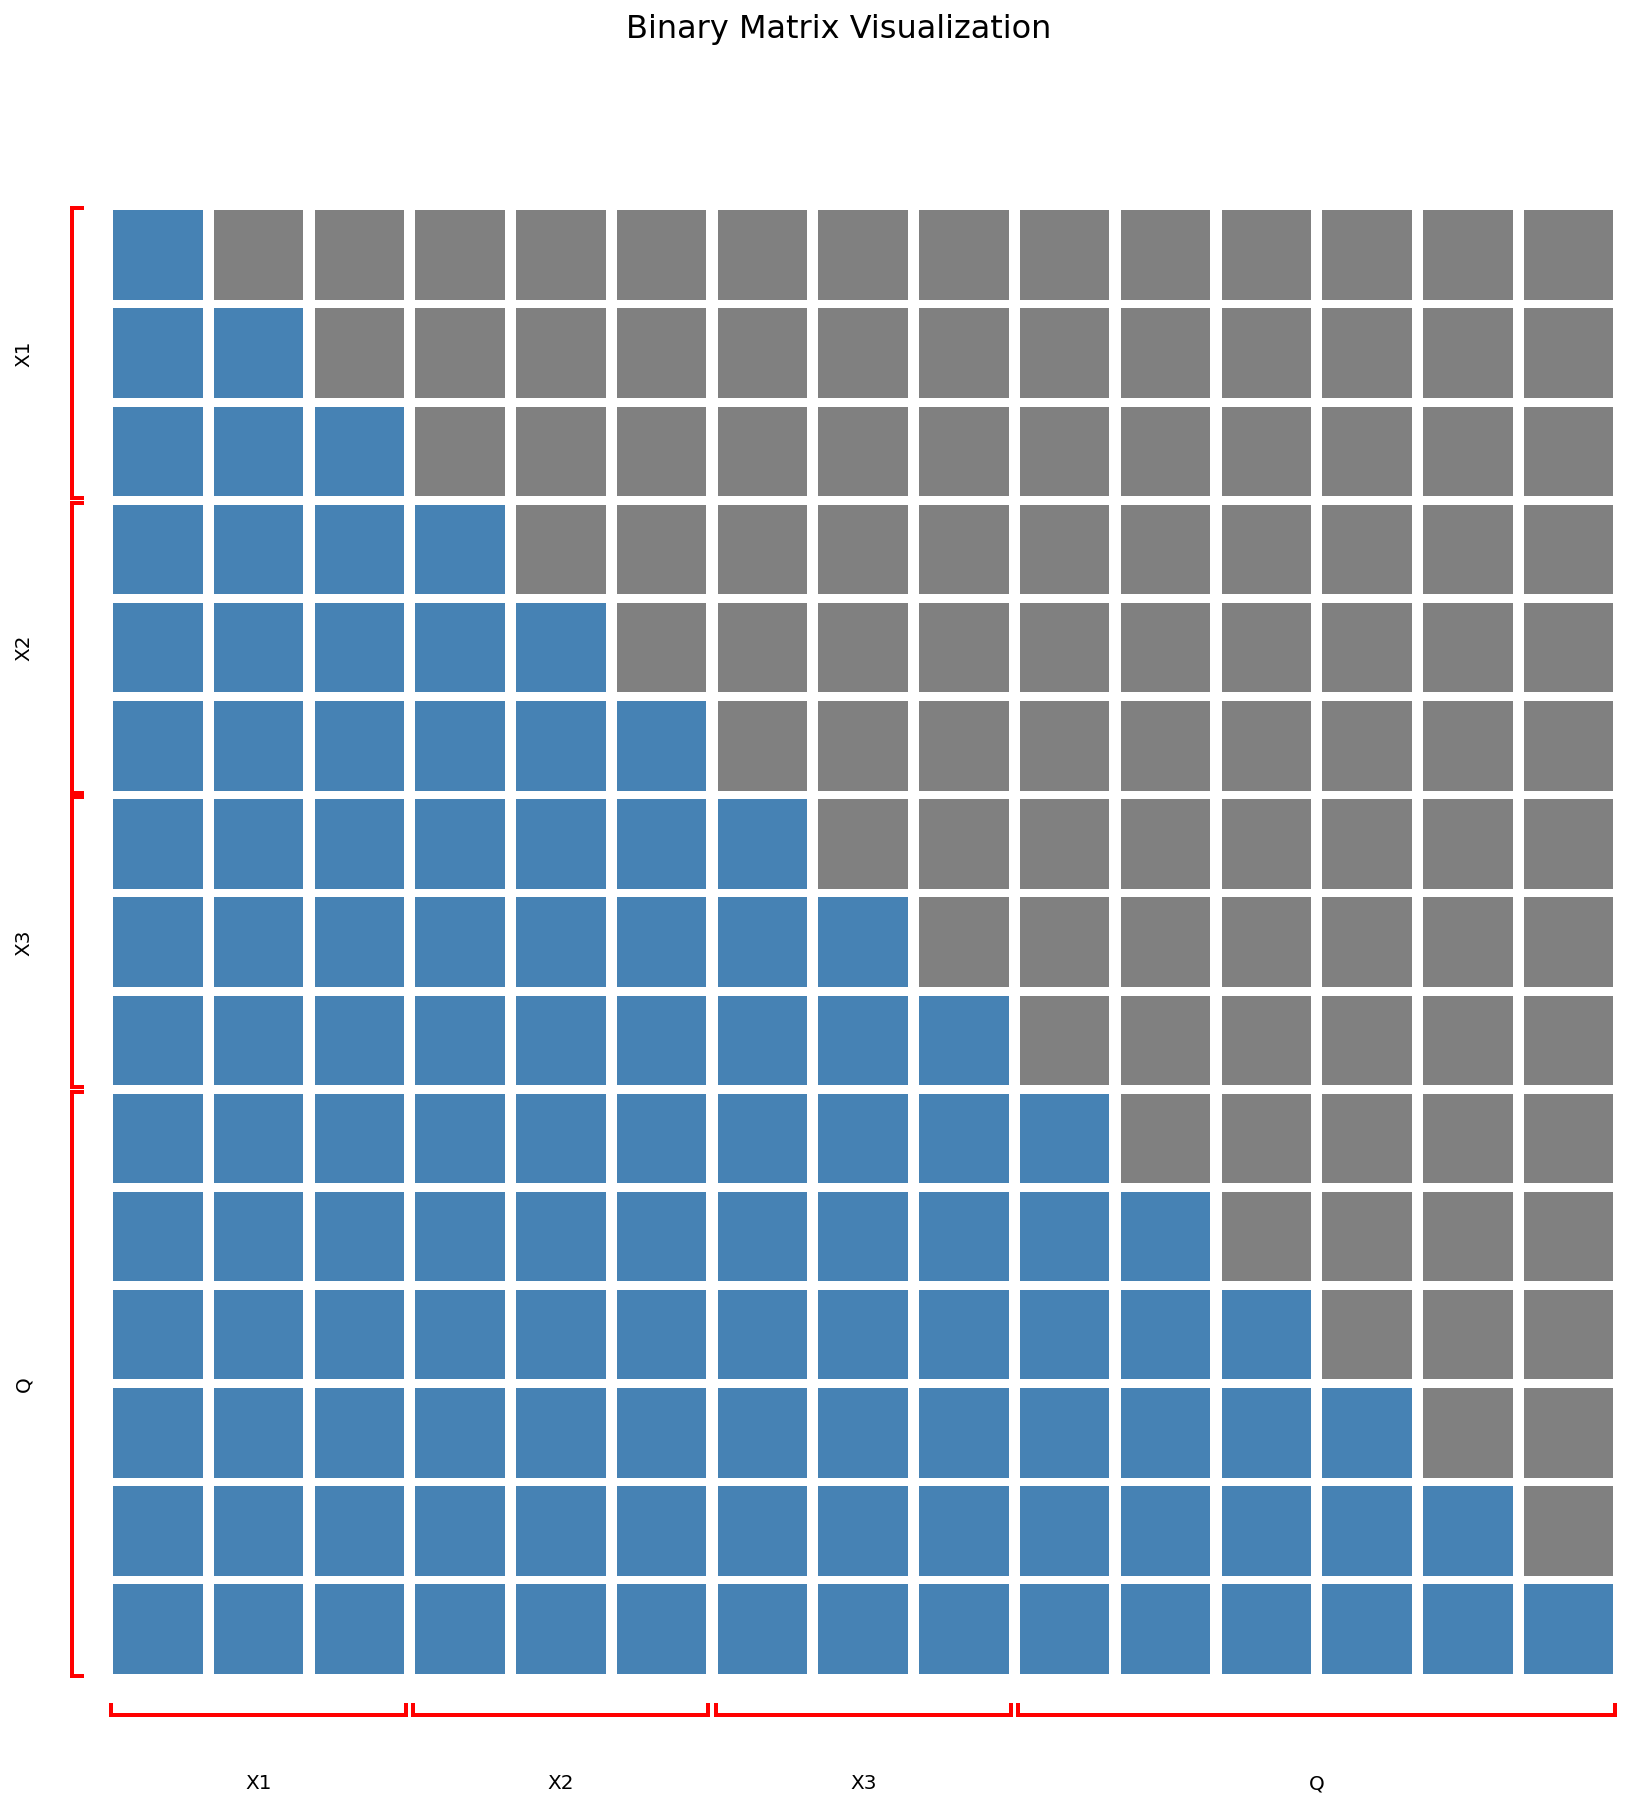

In [8]:
# Standard causal attention

X1 = ICLNode('example1.', id='X1')
X2 = ICLNode('example2.', parents=[X1], id='X2')
X3 = ICLNode('example3.', parents=[X1, X2], id='X3')
Q = ICLNode('What does the fox say?', parents=[X3, X2, X1], id='Q')

print(print_dag(Q, output_character_limit=100))
attention_mask, all_nodes, start_end_pos, names = build_attention_matrix(Q, tokenizer)
visualize_attention_matrix(attention_mask, start_end_pos, names, size_ratio=0.9)

└── O
    └── C
        └── L


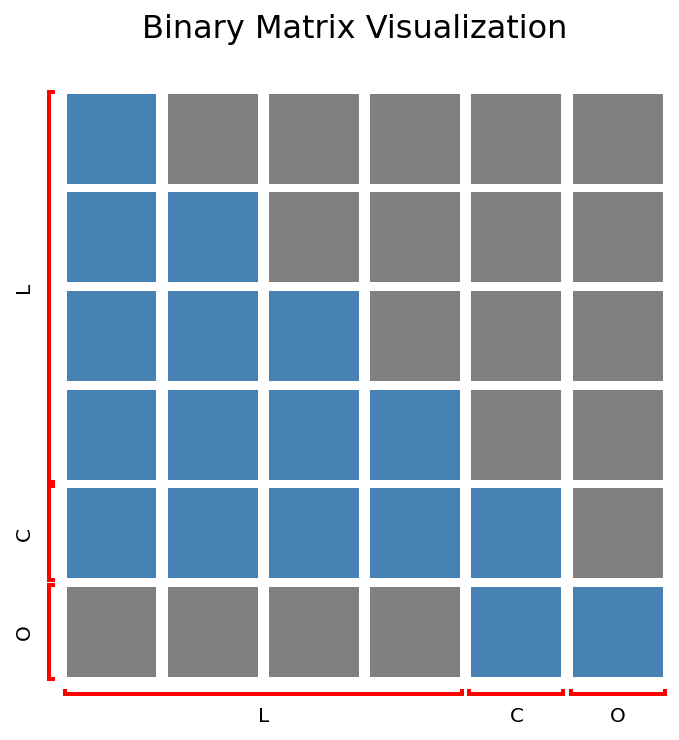

In [4]:
# Token compression style

doc = ICLNode('a list all documents', id='L')
compression = ICLNode('<|eot_id|>', id='C', parents=[doc])
Q = ICLNode('Question', id='O', parents=[compression])

print(print_dag(Q, output_character_limit=100))
attention_mask, nodes, start_end_pos, names = build_attention_matrix(Q, tokenizer)
visualize_attention_matrix(attention_mask, start_end_pos, names, size_ratio=0.9)

└── Q
    ├── X3
    ├── X2
    └── X1


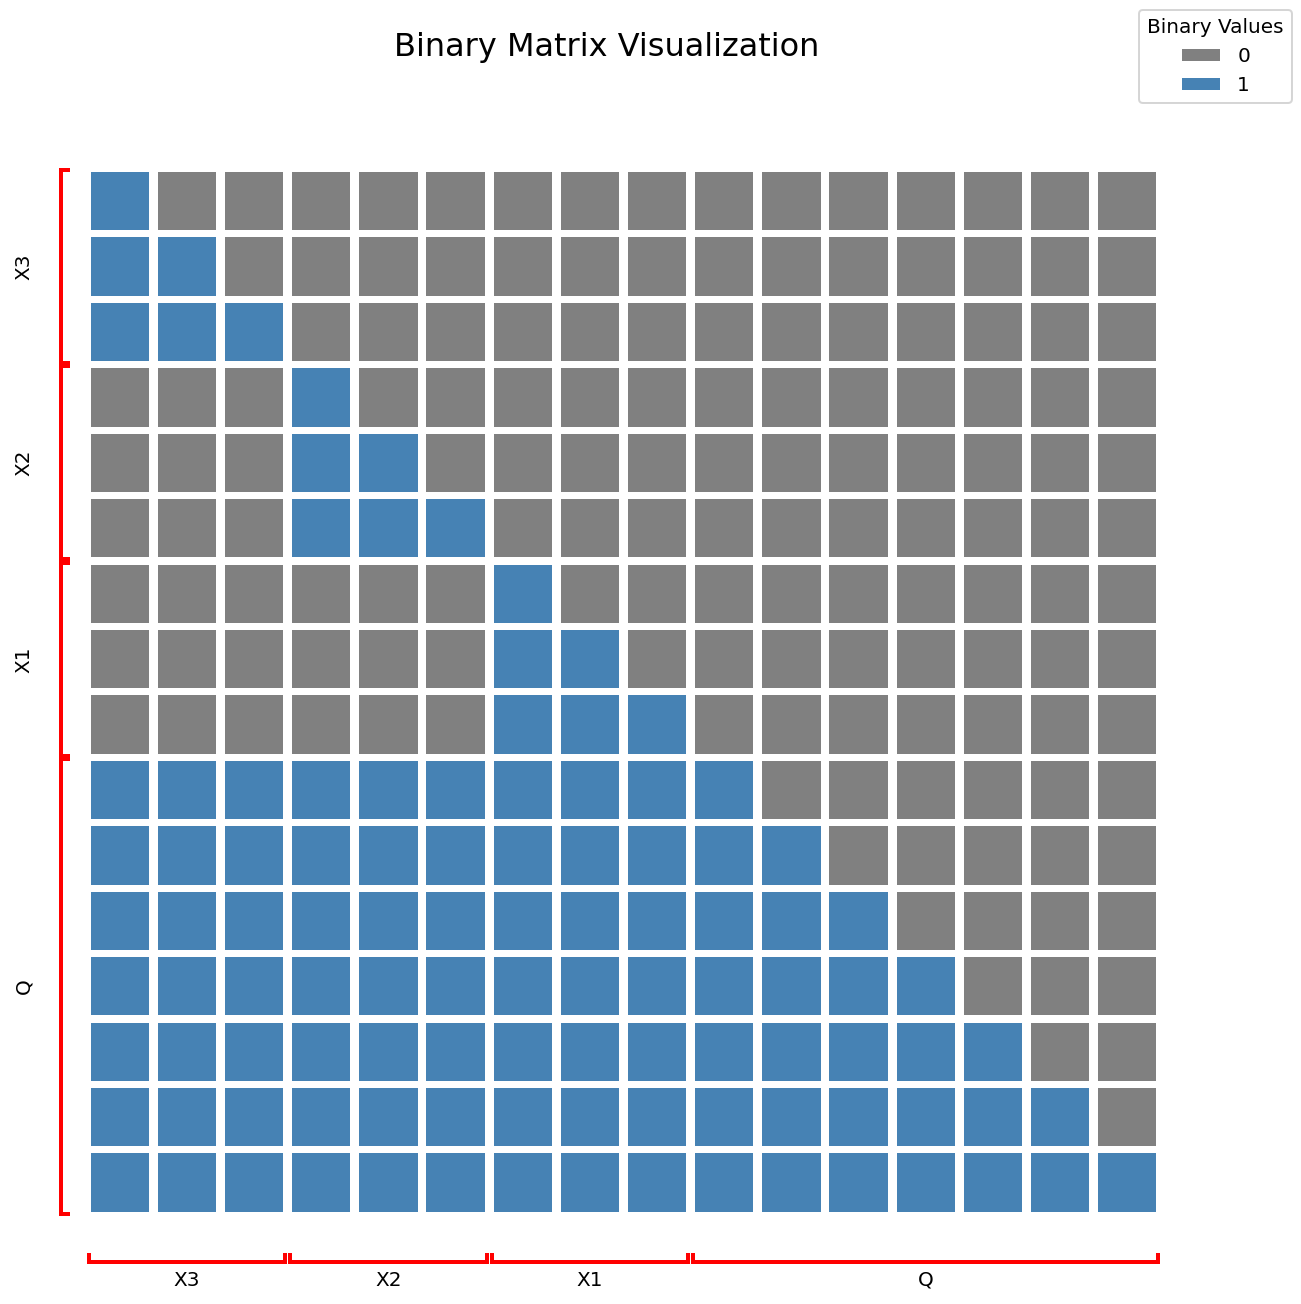

In [24]:
X1 = ICLNode('example1.', id='X1')
X2 = ICLNode('example2.', id='X2')
X3 = ICLNode('example3.', id='X3')
Q = ICLNode('What does the fox say?', parents=[X3, X2, X1], id='Q')

print(print_dag(Q, output_character_limit=100))
attention_mask, start_end_pos, names = build_attention_matrix(Q, tokenizer)
visualize_attention_matrix(attention_mask, start_end_pos, names)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]]


<Figure size 432x288 with 0 Axes>

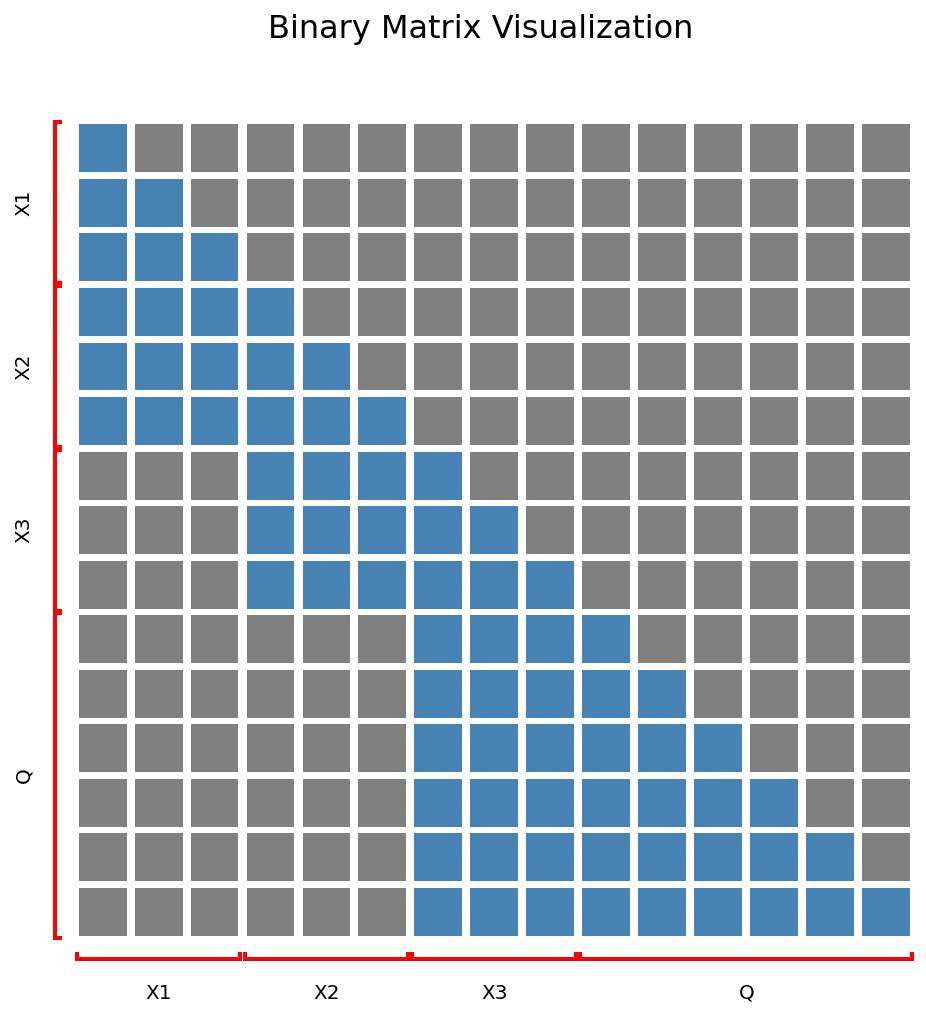

In [19]:
X1 = ICLNode('example1.', id='X1')
X2 = ICLNode('example2.', parents=[X1], id='X2')
X3 = ICLNode('example3.', parents=[X2], id='X3')
Q = ICLNode('What does the fox say?', parents=[X3], id='Q')

attention_mask, all_nodes, start_end_pos, names = build_attention_matrix(Q, tokenizer)
print(attention_mask)
plt.figure()
visualize_attention_matrix(attention_mask, start_end_pos, names, size_ratio=0.5,
                          save_dir='./figures/mask.png')

In [26]:
input_ids, position_ids = prepare_inputs(all_nodes)
print(input_ids)
print(position_ids)

tensor([[ 8858,    16,    13,  8858,    17,    13,  8858,    18,    13,  3923,
          1587,   279, 39935,  2019,    30]])
tensor([[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 3, 4, 5]])


In [27]:
for node in [X1, X2, X3, Q]:
    print(node.tokenize(tokenizer))

tensor([8858,   16,   13])
tensor([8858,   17,   13])
tensor([8858,   18,   13])
tensor([ 3923,  1587,   279, 39935,  2019,    30])
